# VaR (Value at Risk)

## first calcul : On uniform distribution

In [1]:
# calculus 
import numpy as np
from numpy.random import seed
from scipy import stats

In [2]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# to have a 'repetable' random number generation
seed(1)

In [4]:
# generate a dataset based on uniform distribution
u = np.random.uniform(low=-80.0, high=20.0, size=1000)

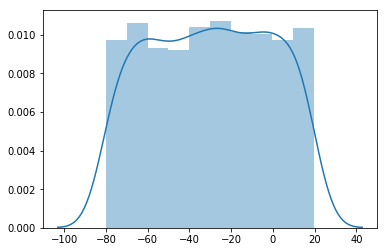

In [5]:
# Visualizing the distribution
sns.distplot(u);

In [6]:
#calcul Var
var_90 = np.quantile(u, 0.9)
var_99 = np.quantile(u, 0.99)
f'VaR 90 : {var_90} - VaR 99 : {var_99}'

'VaR 90 : 10.174427825861457 - VaR 99 : 18.88658785790961'

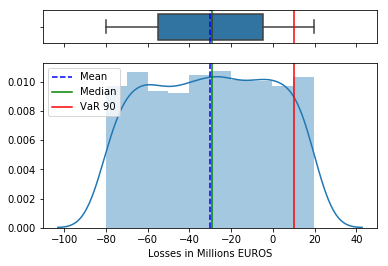

In [7]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=u.mean()
median=np.median(u, axis=0)

sns.boxplot(u, ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(var_90, color='r', linestyle='-')

sns.distplot(u, ax=ax_hist)

ax_hist.axvline(mean, color='b', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(var_90, color='r', linestyle='-')

plt.xlabel('Losses in Millions EUROS')

plt.legend({'Mean':mean,'Median':median,'VaR 90':var_90})

ax_box.set(xlabel='')
plt.show()

## Cumulative Distribution

In [8]:
import pandas as pd
import statsmodels
from IPython.display import display, HTML

import random

In [9]:
print("Dataframe 1: week3_loss_prob.csv")
df_loss_prob = pd.read_csv('data/week3_loss_prob.csv',sep=';')
pd.options.display.max_columns = None
pd.options.display.max_rows = 10
display(df_loss_prob)

Dataframe 1: week3_loss_prob.csv


,losses,prob
0,8.0,1.0
1,-2.0,3.0
2,-5.0,94.0
3,3.0,2.0


In [10]:
df_loss_prob_sorted = df_loss_prob.sort_values(by='losses')

In [11]:
df_loss_prob_sorted['weight']=df_loss_prob_sorted['prob']*0.01

In [12]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 10
display(df_loss_prob_sorted)

,losses,prob,weight
2,-5.0,94.0,0.94
1,-2.0,3.0,0.03
3,3.0,2.0,0.02
0,8.0,1.0,0.01


In [13]:
df_losses = np.random.choice(df_loss_prob_sorted['losses'], size=1000, p=df_loss_prob_sorted['weight'])

/Users/jscaze/anaconda/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


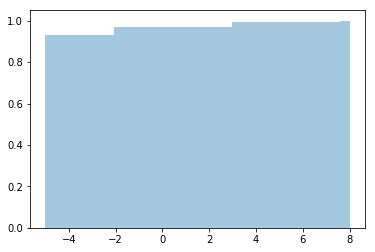

In [14]:
kwargs = {'cumulative': True}
sns.distplot(df_losses, hist_kws=kwargs, kde_kws=kwargs)

## First example on losses list

In [15]:
# import sample
print("Dataframe : week3_losses.csv")
df_sample_losses = pd.read_csv('data/week3_losses.csv',sep=';')
pd.options.display.max_columns = None
pd.options.display.max_rows = 6
display(df_sample_losses)

Dataframe : week3_losses.csv


,observation_no,loss
0,1,-1.198177
1,2,1.006195
2,3,0.501485
...,...,...
1501,1502,30.010000
1502,1503,-2.560000
1503,1504,8.270000


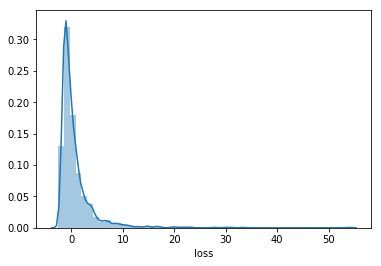

In [19]:
# Visualizing the distribution
sns.distplot(df_sample_losses['loss'])

In [30]:
#calcul Var
var_90 = np.quantile(df_sample_losses['loss'], 0.9)
var_95 = np.quantile(df_sample_losses['loss'], 0.95)
var_99 = np.quantile(df_sample_losses['loss'], 0.99)
f'VaR 90 : {var_90} - Var 95 : {var_95} - VaR 99 : {var_99}'

'VaR 90 : 3.7885066075568226 - Var 95 : 6.6796142564132825 - VaR 99 : 16.45230115782062'

In [31]:
var_95 = np.quantile(df_sample_losses['loss'], 0.95, interpolation='nearest')
f'Var 95 : {var_95}'

'Var 95 : 6.681713291911111'

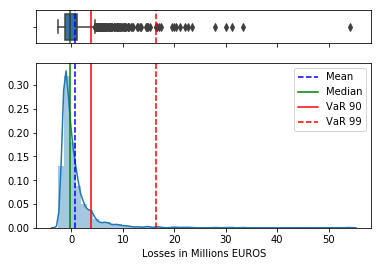

In [25]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=np.mean(df_sample_losses['loss'])
median=np.median(df_sample_losses['loss'], axis=0)

sns.boxplot(df_sample_losses['loss'], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(var_90, color='r', linestyle='-')
ax_box.axvline(var_99, color='r', linestyle='--')

sns.distplot(df_sample_losses['loss'], ax=ax_hist)

ax_hist.axvline(mean, color='b', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(var_90, color='r', linestyle='-')
ax_hist.axvline(var_99, color='r', linestyle='--')

plt.xlabel('Losses in Millions EUROS')

plt.legend({'Mean':mean,'Median':median,'VaR 90':var_90,'VaR 99':var_99 })

ax_box.set(xlabel='')
plt.show()

In [36]:
#number of value upper to VAR 95
l=len(df_sample_losses[df_sample_losses['loss'] >=  var_95])
f'number of value upper to VAR 95 : {l}'

'number of value upper to VAR 95 : 76'

In [37]:
#check percentage of value
l/len(df_sample_losses)

0.05053191489361702